# Code Exercises 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

Exercise 6-1.
The norm of a matrix is related to the scale of the numerical values in the matrix. In
this exercise, you will create an experiment to demonstrate this. In each of 10 experi‐
ment iterations, create a 10 × 10 random numbers matrix and compute its Frobenius
norm. Then repeat this experiment 40 times, each time scalar multiplying the matrix
by a different scalar that ranges between 0 and 50. The result of the experiment
will be a 40 × 10 matrix of norms. Figure 6-7 shows the resulting norms, averaged
over the 10 experiment iterations. This experiment also illustrates two additional
properties of matrix norms: they are strictly nonnegative and can equal 0 only for the
zeros matrix

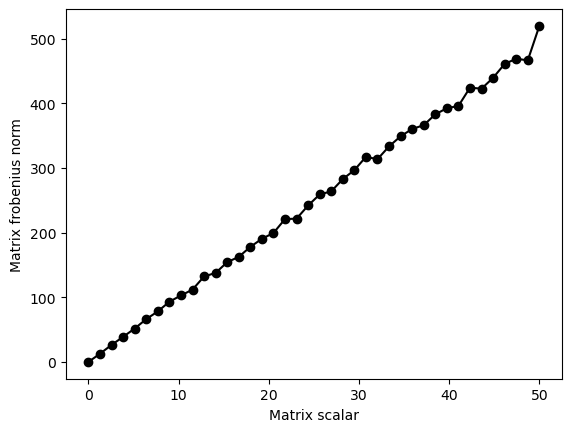

In [2]:
scale_val = np.linspace(0, 50, 40)

n_experiment = 10 

res = np.zeros((len(scale_val), n_experiment)) 

for i in range(len(scale_val)) : 
    for j in range(n_experiment) : 
        
        tmp = np.random.randn(10, 10) * scale_val[i]

        res[i, j] = np.linalg.norm(tmp)

fig, ax = plt.subplots()

plt.plot(scale_val, np.mean(res, axis = 1), 'ko-')
plt.xlabel("Matrix scalar")
plt.ylabel("Matrix frobenius norm")

plt.show()

Exercise 6-2.
In this exercise, you will write an algorithm that finds a scalar that brings the
Frobenius distance between two matrices to 1. Start by writing a Python function
that takes two matrices (of the same size) as input and returns the Frobenius distance
between them. Then create two N × N random numbers matrices (I used N = 7 in
the solutions code, but you can use any other size). Create a variable s = 1 that
scalar multiplies both matrices. Compute the Frobenius distance between the scaled
matrices. As long as that distance remains above 1, set the scalar to be .9 times itself
and recompute the distance between the scaled matrices. This should be done in
a while loop. When the Frobenius distance gets below 1, quit the while loop and
report the number of iterations (which corresponds to the number of times that the
scalar s was multiplied by .9) and the scalar value

In [3]:
def frobenius_distance(m1 :np.array, m2 :np.array) : 
    m1 = m1 - m2 

    return np.sqrt(np.sum(m1) ** 2)

m1 = np.random.randn(7, 7)
m2 = np.random.randn(7, 7)

s = 1
count = 0
while(frobenius_distance(s * m1 , s * m2) > 1) : 
    count += 1 
    s *= 0.9 

print(count)


0


Exercise 6-3.
Demonstrate that the trace method and the Euclidean formula produce the same
result (the Frobenius norm). Does the trace formula work only for A
TA, or do you
get the same result for AAT


In [4]:
a = np.random.randn(3, 4)

ata = a.T @  a 

print(f'Trace of matrix : {np.trace(ata)}')
print(f'Euclidean of matrix: {np.sum(a ** 2)}')

Trace of matrix : 3.351005665627574
Euclidean of matrix: 3.351005665627574


=> Tổng bình phương Euclidean của ma trận a bằng với trace của matrix $A^TA$ 

Exercise 6-4.
This will be a fun exercise,7
 because you’ll get to incorporate material from this and
the previous chapters. You will explore the impact of shifting a matrix on the norm
of that matrix. Start by creating a 10 × 10 random matrix and compute its Frobenius
norm. Then code the following steps inside a for loop: (1) shift the matrix by a
fraction of the norm, (2) compute the percent change in norm from the original,
(3) compute the Frobenius distance between the shifted and original matrices, and
(4) compute the correlation coefficient between the elements in the matrices (hint:
correlate the vectorized matrices using np.flatten()). The fraction of the norm that
you shift by should range from 0 to 1 in 30 linearly spaced steps. Make sure that at
each iteration of the loop, you use the original matrix, not the shifted matrix from the
previous iteration. You should get a plot that looks like Figure 6-8.

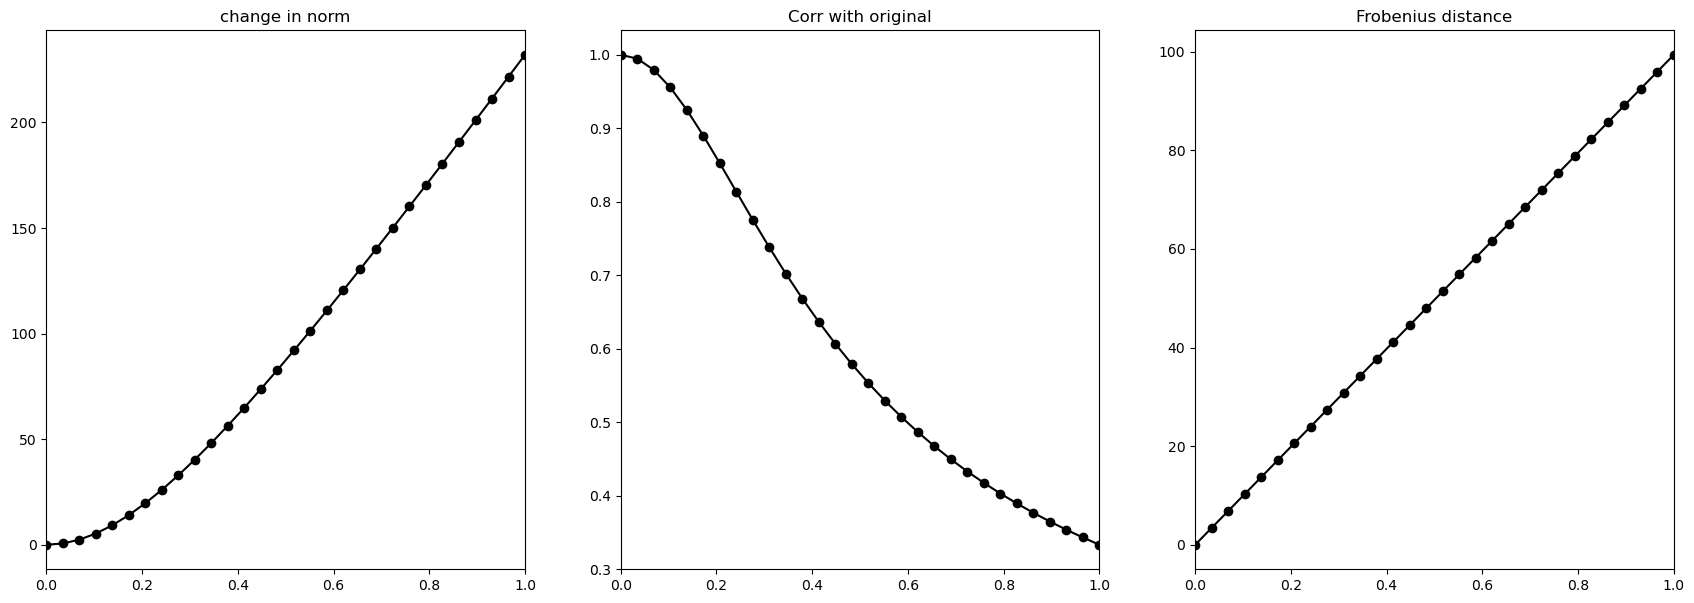

In [5]:
m = np.random.randn(10, 10)
o_norm = np.linalg.norm(m)

step = np.linspace(0, 1, 30)

change_in_norm = np.zeros(len(step))
corr = np.zeros(len(step))
frobenius = np.zeros(len(step))

for i in range(len(step)) : 
    tmp = m + step[i] * o_norm * np.eye(10)

    change_in_norm[i] = (np.linalg.norm(tmp) - o_norm) / o_norm * 100
    corr[i] = np.corrcoef(tmp.flatten(), m.flatten())[0, 1]
    frobenius[i] = frobenius_distance(m, tmp)

fig, ax = plt.subplots(ncols = 3, figsize = (21, 7))

ax[0].plot(step, change_in_norm,  'ko-')
ax[0].set_title('change in norm')
ax[0].set_xlim([0, 1])

ax[1].plot(step, corr, 'ko-')
ax[1].set_title('Corr with original')
ax[1].set_xlim([0, 1])


ax[2].plot(step, frobenius, 'ko-')
ax[2].set_title('Frobenius distance')
ax[2].set_xlim([0, 1])

plt.show()

Exercise 6-5.
I will now show you how to create random matrices with arbitrary rank (subject
to the constraints about matrix sizes, etc.). To create an M × N matrix with rank r,
multiply a random M × r matrix with an r × N matrix. Implement this in Python and
confirm that the rank is indeed r. What happens if you set r > min{M,N}, and why
does that happen?


In [6]:
r_1 = 5
r_2 = 2
n = np.random.randn(4 , r_2 )
m = np.random.randn(r_2, 7)

print(f'Solution: {np.linalg.matrix_rank(n @ m)}')


Solution: 2


Exercise 6-6.
Demonstrate the addition rule of matrix rank (r(A + B) ≤ r(A) + r(B)) by creating
three pairs of rank-1 matrices that have a sum with (1) rank-0, (2) rank-1, and (3)
rank-2. Then repeat this exercise using matrix multiplication instead of addition.

In [7]:
# create matrix 
r = [1, 8]

m = np.random.randn(10, r[0]) @ np.random.randn(r[0], 7)
n = np.random.randn(10, r[1]) @ np.random.randn(r[1], 7)


print(f'r(A + B) : {np.linalg.matrix_rank(m + n)}')
print(f'r(A) : {np.linalg.matrix_rank(m)} , r(B) : {np.linalg.matrix_rank(n)}')


r(A + B) : 7
r(A) : 1 , r(B) : 7


Exercise 6-7.
Put the code from Exercise 6-5 into a Python function that takes parameters M and
r as input and provides a random M × M rank-r matrix as output. In a double for
loop, create pairs of 20 × 20 matrices with individual ranks varying from 2 to 15. Add
and multiply those matrices, and store the ranks of those resulting matrices. Those
ranks can be organized into a matrix and visualized as a function of the ranks of the
individual matrices (Figure 6-9).


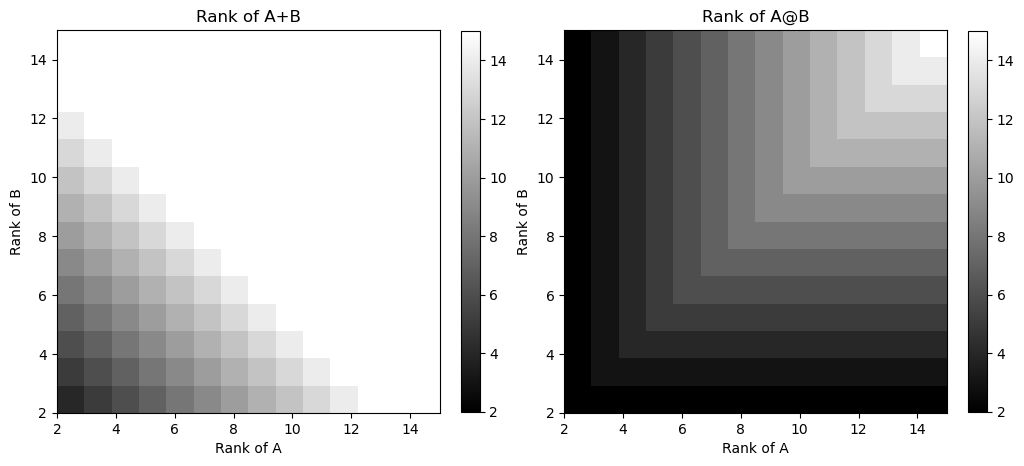

In [18]:
def random_matrix_with_rank(cols: int, rank : int) :
    return np.random.randn(cols, rank) @ np.random.rand(rank, cols)

M = 20 
res = np.zeros(( len(r), len(r),2))
r = range(2, 16)
s = '+@'
for i in range(len(r)) : 
    for j in range(len(r)) : 
        A = random_matrix_with_rank(M, r[i])
        B = random_matrix_with_rank(M, r[j] ) 
        res[i, j,0] = np.linalg.matrix_rank(A + B)
        res[i, j,1] = np.linalg.matrix_rank(A @ B)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =  (12, 6))

for i in range(2) : 

    h = ax[i].imshow(res[ :, :,i], vmin = np.min(r), vmax = np.max(r), origin = 'lower',
                  extent = [r[0], r[-1], r[0], r[-1]], cmap = 'gray')
    
    fig.colorbar(h, ax = ax[i], fraction = 0.045)
    ax[i].set_xlabel('Rank of A')
    ax[i].set_ylabel('Rank of B')
    ax[i].set_title(f'Rank of A{s[i]}B')

plt.show()



Exercise 6-8.
Interestingly, the matrices A, $A^T$ , $A^TA$, and $AA^T$
 all have the same rank. Write code
to demonstrate this, using random matrices of various sizes, shapes (square, tall,
wide), and ranks

In [24]:
shape = np.random.randint(low = 1, high = 100, size = 2)

A = np.random.randn(shape[0], shape[1])

print(f'Rank of matrix A is {np.linalg.matrix_rank(A)}')
print(f'Rank of matrix A^T is {np.linalg.matrix_rank(A.T)}')
print(f'Rank of matrix ATA is {np.linalg.matrix_rank(A @ A.T)}')
print(f'Rank of matrix AAT is {np.linalg.matrix_rank(A.T @ A )}')

Rank of matrix A is 58
Rank of matrix A^T is 58
Rank of matrix ATA is 58
Rank of matrix AAT is 58


Exercise 6-9.
The goal of this exercise is to answer the question v ∈ C A ? Create a rank-3 matrix
A ∈ ℝ
4 × 3 and vector v ∈ ℝ
4
 using numbers randomly drawn from a normal distri‐
bution. Follow the algorithm described earlier to determine whether the vector is in
the column space of the matrix. Rerun the code multiple times to see whether you
find a consistent pattern. Next, use a A ∈ ℝ
4 × 4 rank-4 matrix. I’m willing to bet one million bitcoins8
 that you always find that v ∈ C A when A is a 4 × 4 random matrix
(assuming no coding mistakes). What makes me confident about your answer?9
For an extra challenge, put this code into a function that returns True or False
depending on the outcome of the test, and that raises an exception (that is, a useful
error message) if the size of the vector does not match for matrix augmentation.

In [26]:
def  is_v_in_matrix (A :np.array, v : np.array) : 
    rankA = np.linalg.matrix_rank(A)

    rankAv = np.linalg.matrix_rank(np.hstack((A, v)))
     
    return rankA == rankAv

A = np.random.randn(4, 3) @ np.random.randn(3, 3)
v = np.random.randn(4, 1)

print(is_v_in_matrix(A, v))


False


In [28]:
B = np.random.randn(4, 4) @ np.random.randn(4, 4)
print(is_v_in_matrix(B, v))

True


-> Khi ma trận có rank đạt giá trị max (rank = số cột = số hàng) khi đó tập vector là độc lập tuyến tính, nó có thể được dùng để miêu tả toàn bộ không gian $ R^{n x n} $ khi đó v luôn nằm trong ma trận đó

Exercise 6-10.
Remember that the determinant of a reduced-rank matrix is—in theory—zero. In this
exercise, you will put this theory to the test. Implement the following steps: (1) Create
a square random matrix. (2) Reduce the rank of the matrix. Previously you’ve done
this by multiplying rectangular matrices; here, set one column to be a multiple of
another column. (3) Compute the determinant and store its absolute value.
Run these three steps in a double for loop: one loop over matrix sizes ranging
from 3 × 3 to 30 × 30 and a second loop that repeats the three steps one hundred
times (repeating an experiment is useful when simulating noise data). Finally, plot
the determinant, averaged over the one hundred repeats, in a line plot as a function
of the number of elements in the matrix. Linear algebra theory predicts that that
line (that is, the determinants of all the reduced-rank matrices) is zero, regardless of
the matrix size. Figure 6-10 shows otherwise, reflecting the computational difficulties
with accurately computing the determinant. I log transformed the data for increased
visibility; you should inspect the plot using log scaling and linear scaling

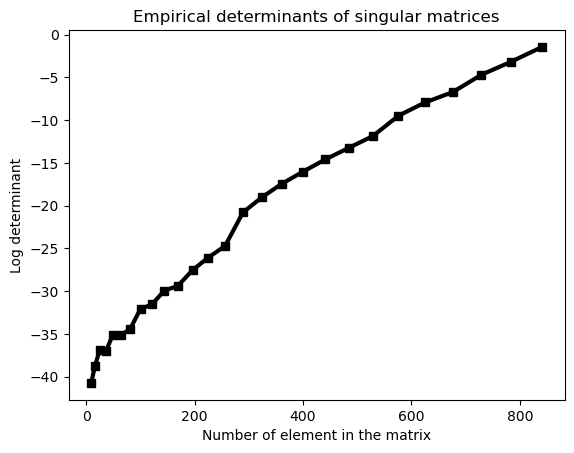

In [33]:
scale = np.arange(3, 30, 1)

init = 100 
res = np.zeros((len(scale), init))
for i in range(len(scale)) : 
    for j in range(init) : 
        tmp_matrix = np.random.randn(scale[i], scale[i])

        tmp_matrix[0, :] = tmp_matrix[1, :]

        res[i, j] = np.abs(np.linalg.det(tmp_matrix))

fig, ax = plt.subplots()

ax.plot(scale ** 2,  np.log(np.mean(res, axis = 1)), 'ks-', linewidth = 3)
ax.set_xlabel('Number of element in the matrix')
ax.set_ylabel('Log determinant')
ax.set_title('Empirical determinants of singular matrices')
plt.show()